# Таратин Артём ПМ22-1 Вариант 1

In [368]:
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import seaborn as sns

import re

import pandas as pd
import numpy as np

1. Загрузите данные по вариантам в ноутбук.

In [392]:
url = 'https://github.com//koroteevmv/ML_course/raw/2023_new/ML0.2 simple analisys/data/Вариант 1.xlsx'
file_contents = requests.get(url).content
df = pd.read_excel(BytesIO(file_contents), index_col=0, header=2)
df.head()

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0
4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0
5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0


2. Сделайте описательную статистику полученных данных.

In [3]:
df.shape

(3049, 10)

In [4]:
df.describe()

,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,3048.000000,3048.000000,3048.000000,3049.000000,3048.0
mean,138.753281,340.787730,43.573491,72.769029,24.0
std,41.793413,39.077186,8.931816,13.662666,0.0
min,104.000000,101.000000,8.000000,20.000000,24.0
25%,126.000000,339.000000,38.000000,64.000000,24.0
50%,144.000000,342.000000,45.000000,72.000000,24.0
75%,148.000000,346.000000,50.000000,82.000000,24.0
max,1106.000000,706.000000,58.000000,100.000000,24.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3049 entries, 1.0 to nan
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   № школы                        3048 non-null   float64
 1   Класс                          3048 non-null   object 
 2   Пол                            3048 non-null   object 
 3   Номер варианта                 3048 non-null   float64
 4   Задания с кратким ответом      3048 non-null   object 
 5   Задания с развёрнутым ответом  3048 non-null   object 
 6   Устная часть                   1 non-null      object 
 7   Первичный балл                 3048 non-null   float64
 8   Балл                           3049 non-null   float64
 9   Минимальный балл               3048 non-null   float64
dtypes: float64(5), object(5)
memory usage: 262.0+ KB


In [6]:
df.dtypes

№ школы                          float64
Класс                             object
Пол                               object
Номер варианта                   float64
Задания с кратким ответом         object
Задания с развёрнутым ответом     object
Устная часть                      object
Первичный балл                   float64
Балл                             float64
Минимальный балл                 float64
dtype: object

3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [7]:
below_mean_percent = len(df[df['Балл'] < df['Балл'].mean()]) / len(df) * 100
print(f"Процент учащихся, выполнивших работу ниже среднего: {below_mean_percent:.6f}%")

Процент учащихся, выполнивших работу ниже среднего: 51.262709%


4. Найти процент учащихся не сдавших экзамен.

In [8]:
not_pass_percent = len(df[df['Балл'] < df['Минимальный балл']]) / len(df) * 100
print(f"Процент учащихся, не сдавших экзамен (Балл): {not_pass_percent:.6f}%")

Процент учащихся, не сдавших экзамен (Балл): 0.131191%


In [9]:
not_pass_percent = len(df[df['Первичный балл'] < df['Минимальный балл']]) / len(df) * 100
print(f"Процент учащихся, не сдавших экзамен (Первичный балл): {not_pass_percent:.6f}%")

Процент учащихся, не сдавших экзамен (Первичный балл): 3.017383%


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

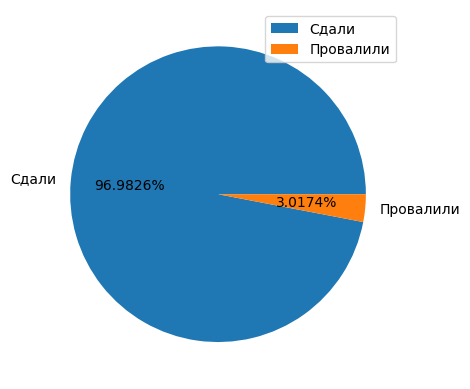

In [24]:
grouped = df.groupby(df['Первичный балл'] < df['Минимальный балл']).size().rename({True: 'Провалили', False: 'Сдали'})
grouped.plot(kind='pie', autopct='%1.4f%%')
plt.legend(['Сдали', 'Провалили'])

6. Постройте ядерную оценку плотности распределению баллов за экзамен.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


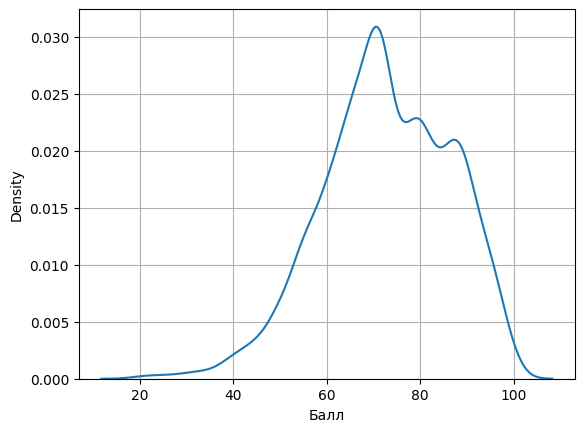

In [11]:
sns.kdeplot(df['Балл'])

plt.grid(True)

plt.show()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [402]:
marks_grouped = df.groupby('Балл').size()

mark_2 = marks_grouped.where(marks_grouped.index < 50).sum()
mark_3 = marks_grouped.where((50 <= marks_grouped.values) & (marks_grouped.index < 70)).sum()
mark_4 = marks_grouped.where((70 <= marks_grouped.index) & (marks_grouped.index < 85)).sum()
mark_5 = marks_grouped.where(85 <= marks_grouped.index).sum()

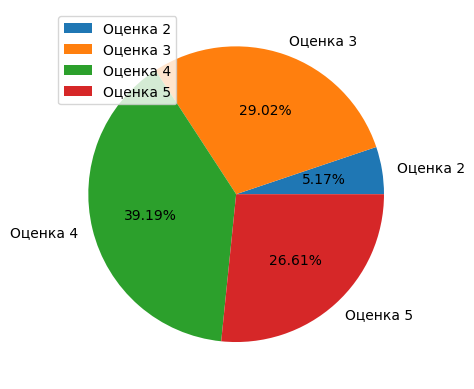

In [403]:
labels = ['Оценка 2', 'Оценка 3', 'Оценка 4', 'Оценка 5']
plt.pie([mark_2, mark_3, mark_4, mark_5], autopct='%1.2f%%', labels=labels)
plt.legend(labels, loc='upper left')
plt.show()

In [387]:
perc_mark_2 = (mark_2 / len(df)) * 100
perc_mark_3 = (mark_3 / len(df)) * 100
perc_mark_4 = (mark_4 / len(df)) * 100
perc_mark_5 = (mark_5 / len(df)) * 100

print(f'Процент учащихся, сдавших экзамен на отлично: {perc_mark_5:.2f}%')
print(f'Процент учащихся, сдавших экзамен на хорошо: {perc_mark_4:.2f}%')
print(f'Процент учащихся, сдавших экзамен на удовлетворительно: {perc_mark_3:.2f}%')
print(f'Процент учащихся, сдавших экзамен на неудовлетворительно: {perc_mark_2:.2f}%')

Процент учащихся, сдавших экзамен на отлично: 24.63%
Процент учащихся, сдавших экзамен на хорошо: 36.27%
Процент учащихся, сдавших экзамен на удовлетворительно: 34.31%
Процент учащихся, сдавших экзамен на неудовлетворительно: 4.79%


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [93]:
df.groupby('Пол').size() / len(df) * 100

Пол
Ж    57.953427
М    42.013775
dtype: float64

9. Сколько школ принимало участие в экзамене?

In [108]:
pd.unique(df['№ школы']).size

25

In [109]:
len(set(df['№ школы']))

25

10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [144]:
marks_short = df['Задания с кратким ответом'].iloc[0]
marks_short, len(marks_short)

('1+++--1+-++---0---------0', 25)

In [145]:
marks_long = re.sub(r'\(\d\)', '', df['Задания с развёрнутым ответом'].iloc[0])
marks_long, len(marks_long)

('000000000000', 12)

11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [371]:
tasks = {i:[] for i in range(25)}

for i in df['Задания с кратким ответом']:
    if not isinstance(i, str):
        continue
    
    for j in range(len(i)):
        tasks[j].append(i[j])

In [372]:
for i, j in tasks.items():
    if j[0].isdigit():
        j = list(map(int, j))
        print(i, sum(j) / max(j) / len(j))
    else:
        print(i, j.count('+') / len(j))

0 0.9019028871391076
1 0.9288057742782152
2 0.8733595800524935
3 0.7729658792650919
4 0.5895669291338582
5 0.9061679790026247
6 0.7658792650918635
7 0.7559055118110236
8 0.8412073490813649
9 0.9688320209973753
10 0.931758530183727
11 0.755249343832021
12 0.8313648293963255
13 0.7017716535433071
14 0.8700787401574803
15 0.6896325459317585
16 0.672244094488189
17 0.7417979002624672
18 0.6935695538057742
19 0.8274278215223098
20 0.718503937007874
21 0.4806430446194226
22 0.7654199475065617
23 0.2477034120734908
24 0.8173392388451444


12. Аналогично и с типом С (ответы с развернутым ответом)

In [279]:
tasks = {i:[] for i in range(12)}

for i in df['Задания с развёрнутым ответом']:
    if not isinstance(i, str):
        continue
    
    i = re.sub(r'\(\d\)', '', i)
    
    for j in range(len(i)):
        tasks[j].append(i[j])

In [283]:
for i, j in tasks.items():
    if j[0].isdigit():
        j = list(map(int, j))
        print(i, sum(j) / max(j) / len(j))
    else:
        print(i, j.count('+') / len(j))

0 0.96751968503937
1 0.7461723534558181
2 0.9445538057742782
3 0.7970253718285215
4 0.818733595800525
5 0.6156496062992126
6 0.7118328958880139
7 0.5543525809273842
8 0.5812007874015748
9 0.52001312335958
10 0.97998687664042
11 0.8454724409448819


13. Сделайте анализ по двум школам:

        I. по всем выполненным заданиям типа В

In [295]:
school_117 = df[df['№ школы'] == 117]
school_148 = df[df['№ школы'] == 148]

In [300]:
print(f"Школа 117: {''.join(school_117['Задания с кратким ответом']).count('+') / len(''.join(school_117['Задания с кратким ответом'])) * 100:.4f}")
print(f"Школа 148: {''.join(school_148['Задания с кратким ответом']).count('+') / len(''.join(school_148['Задания с кратким ответом'])) * 100:.4f}")

Школа 117: 62.2737
Школа 148: 63.2615


        II. по заданиям типа С больше 50%

In [356]:
school_117_replaced = [re.sub(r'\(\d\)', '', i) for i in school_117['Задания с развёрнутым ответом']]
school_148_replaced = [re.sub(r'\(\d\)', '', i) for i in school_148['Задания с развёрнутым ответом']]

school_117_replaced_zip = zip(*school_117_replaced)
school_148_replaced_zip = zip(*school_148_replaced)

for i, j in enumerate(zip(school_117_replaced_zip, school_148_replaced_zip)):
    print(f"{i}: {j[0].count('0') / len(j[0]) * 100:.4f} - {j[1].count('0')/ len(j[1]) * 100:.4f}")

0: 6.3158 - 5.2308
1: 6.3158 - 7.6923
2: 8.4211 - 7.0769
3: 10.5263 - 8.3077
4: 7.3684 - 5.8462
5: 5.2632 - 3.6923
6: 10.5263 - 7.3846
7: 25.2632 - 18.7692
8: 24.2105 - 13.2308
9: 23.1579 - 15.3846
10: 4.2105 - 3.0769
11: 15.7895 - 12.3077


        III. по среднему баллу юношей и девушек

In [367]:
print(f"Для 117шк - М: {school_117.where(df['Пол'] == 'М')['Балл'].mean():.4f} - Ж: {school_117.where(df['Пол'] == 'Ж')['Балл'].mean():.4f}")
print(f"Для 148шк - М: {school_148.where(df['Пол'] == 'М')['Балл'].mean():.4f} - Ж: {school_148.where(df['Пол'] == 'Ж')['Балл'].mean():.4f}")

Для 117шк - М: 65.0227 - Ж: 75.6863
Для 148шк - М: 68.1667 - Ж: 75.7459
